In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from matplotlib import pyplot as plt

#### 读取本地CSV数据

In [2]:
data = pd.read_csv("./data/8.Advertising.csv")
x = data[["TV", "Radio", "Newspaper"]]
y = data[["Sales"]]

#### 数据分割 

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=1)

#### 构建模型 
    np.logspace(-3, 2, 10)
    表示取等比数列：默认以10为底 base=10
    

In [4]:
np.set_printoptions(suppress=True, threshold=np.nan)  # 取消科学计数法，并完整显示
np.logspace(-3, 2, 10)

array([  0.001     ,   0.00359381,   0.0129155 ,   0.04641589,
         0.16681005,   0.59948425,   2.15443469,   7.74263683,
        27.82559402, 100.        ])

In [5]:
# lasso = Lasso()
rigde = Ridge()
params = {
    "alpha": np.logspace(-3, 2, 10)
}
lasso_model = GridSearchCV(rigde, param_grid=params, cv=5)
lasso_model.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0.001  ,   0.00359,   0.01292,   0.04642,   0.16681,   0.59948,
         2.15443,   7.74264,  27.82559, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
print("最好的估计器：", lasso_model.best_estimator_)
print("最好的参数：", lasso_model.best_params_)
print("最好的准确率：", lasso_model.best_score_)
print("最好的索引：", lasso_model.best_index_)

最好的估计器： Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
最好的参数： {'alpha': 0.001}
最好的准确率： 0.8743808742046688
最好的索引： 0


In [7]:
predict = lasso_model.predict(x_test)
mse = np.average((predict - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

1.9730457106647625 1.4046514552246627


#### 绘图：预测值与实际值

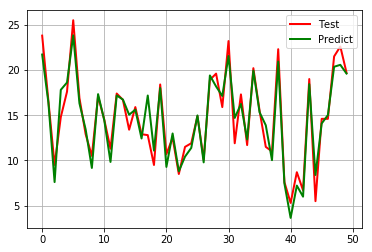

In [8]:
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='Test')
plt.plot(t, predict, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()